# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [2]:
import sys
import os
np.random.seed(122404)
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [3]:
import models as md
importlib.reload(md)
import data_splitting as ds
importlib.reload(ds)
import metricas as mt
importlib.reload(mt)
import auxiliares as aux
importlib.reload(aux)

<module 'auxiliares' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\auxiliares.py'>

In [4]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

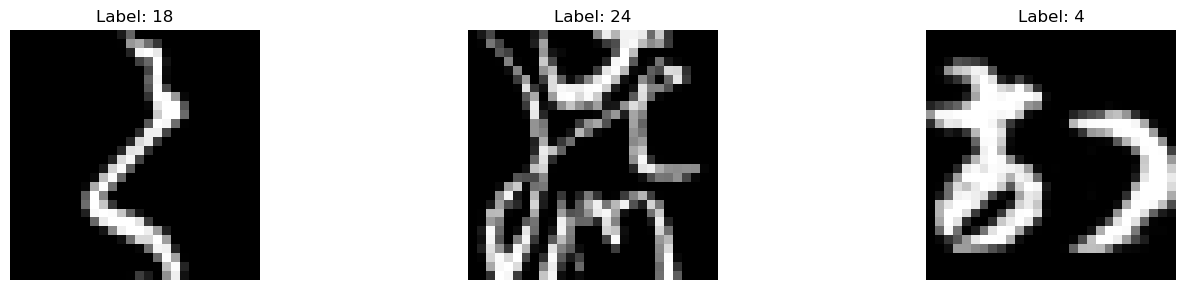

In [5]:
# Choose random pictures from X_images
num_images_to_display = 3
random_indices = np.random.choice(len(X_images), num_images_to_display, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_images[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [6]:
importlib.reload(ds)
# Split the data into train and temp (temporary set for further splitting)
X_normalized = ds.normalize(X_images)
X_train, X_val, X_test, y_train, y_val, y_test = ds.split_data(X_normalized, y_images)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### 2) Implementación y Entrenamiento de una Red Neuronal Básica
- Implementar una red neuronal con L capas ocultas cada con M(l) nodos con función de activación ReLU (en las capas ocultas) y activación softmax para la capa de salida.
- Implementar un algoritmo para entrenar dicha red, mediante backpropagation y gradiente descendiente estándar, utilizando como función de costo la cross-entropy.

NOTA: El algoritmo backpropagation debe sera adaptado para el caso de clasificación multi-clase con función de activación softmax para la capa de salida y función de costo cross-entropy.

- Entrenar una red neuronal con 2 capas ocultas, con 100 y 80 nodos respectivamente, y graficar la evolución de la función de costo (cross-entropy) sobre los conjuntos de entrenamiento y validación a lo largo de las épocas. Llamaremos a este modelo M0

Epoch 0, Loss: 4.011714871685142
loss val: 1.3366634623886713
Epoch 10, Loss: 3.7937602782856454
loss val: 1.276053419104105
Epoch 20, Loss: 3.65606514605996
loss val: 1.2408005499927657
Epoch 30, Loss: 3.5026947126203054
loss val: 1.2001908604674083
Epoch 40, Loss: 3.321470454228951
loss val: 1.1500316265811508
Epoch 50, Loss: 3.1095221122135603
loss val: 1.0895999709273638
Epoch 60, Loss: 2.877384035765197
loss val: 1.0225882261209878
Epoch 70, Loss: 2.6476737046346015
loss val: 0.9552127666528871
Epoch 80, Loss: 2.441694184055507
loss val: 0.8957845528884552
Epoch 90, Loss: 2.2641578868503722
loss val: 0.8463680406933611
Epoch 100, Loss: 2.112114106092578
loss val: 0.805369444905057
Epoch 110, Loss: 1.982267100258831
loss val: 0.7715093360589332
Epoch 120, Loss: 1.870883846463221
loss val: 0.7435527594693645
Epoch 130, Loss: 1.7742170147032135
loss val: 0.7202021219075473
Epoch 140, Loss: 1.6893846871168519
loss val: 0.7002441552330468
Epoch 150, Loss: 1.6138036537550604
loss val: 0

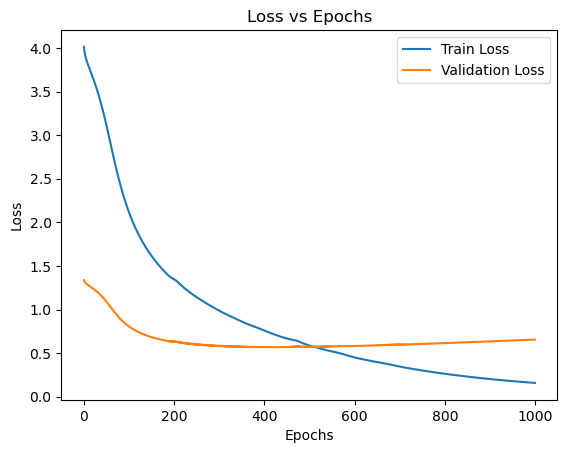

In [7]:
importlib.reload(md)

m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [100,80])


Reportar las siguientes métricas de performance, sobre los conjuntos de entrenamiento
y validación, para el modelo base entrenado:
- Accuracy
- Cross-Entropy
- Matriz de Confusión

Accuracy: 0.5870
Cross Entropy: 1.9668


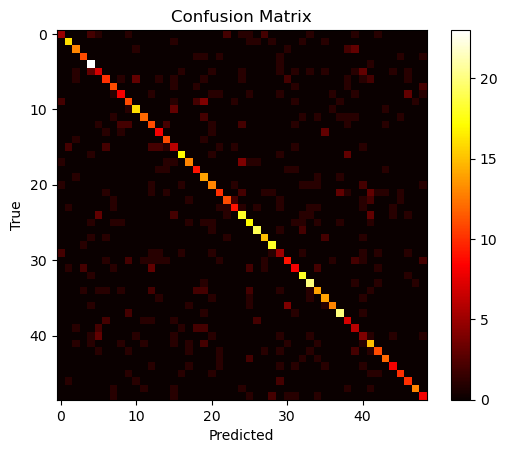

In [8]:
importlib.reload(mt)
y_pred_val = m0.forward_pass(X_val, False)
get_metrics = mt.get_metrics(y_pred_val, y_val)

### 3) Implementación y Entrenamiento de una Red Neuronal Avanzada

Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de entrenamiento y la performance del modelo resultante.
- Rate scheduling lineal (con saturación) y exponencial.
- Mini-batch stochastic gradient descent.
- Optimizador ADAM.
- Regularización L2.
- Regularización mediante early stopping.
- OPCIONAL: Regularización mediante dropout.
- OPCIONAL: batch normalization.


In [9]:
funciones_de_activacion = ["ReLU", "ReLU", "softmax"]
nodos_por_capa = [100, 80]

Epoch 0, Loss: 3.9755400046716374
loss val: 1.3323479273524452
Epoch 10, Loss: 3.729194361858526
loss val: 1.2608416679359256
Epoch 20, Loss: 3.5482241024066594
loss val: 1.2105508975783468
Epoch 30, Loss: 3.3435493429284526
loss val: 1.1540564409475587
Epoch 40, Loss: 3.11630124382381
loss val: 1.0893914732371917
Epoch 50, Loss: 2.8834310863661807
loss val: 1.0207974697236784
Epoch 60, Loss: 2.663891328647746
loss val: 0.9558051508066092
Epoch 70, Loss: 2.470803444505647
loss val: 0.899724155227048
Epoch 80, Loss: 2.304983183125121
loss val: 0.8533613235195722
Epoch 90, Loss: 2.164054560527029
loss val: 0.8155654135100552
Epoch 100, Loss: 2.0441917986066294
loss val: 0.7848194849266538
Epoch 110, Loss: 1.9410425762306835
loss val: 0.7592392187927164
Epoch 120, Loss: 1.851081755610132
loss val: 0.7377736037103187
Epoch 130, Loss: 1.7716737907078657
loss val: 0.7196539245680674
Epoch 140, Loss: 1.7011119557781706
loss val: 0.7043337561712759
Epoch 150, Loss: 1.6377464497096594
loss val:

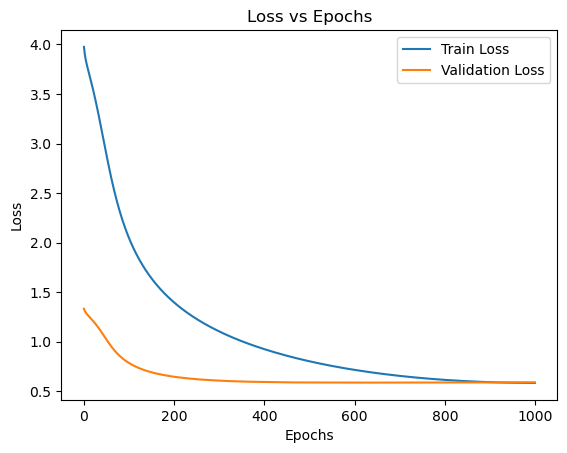

Accuracy: 0.5770
Cross Entropy: 1.7705


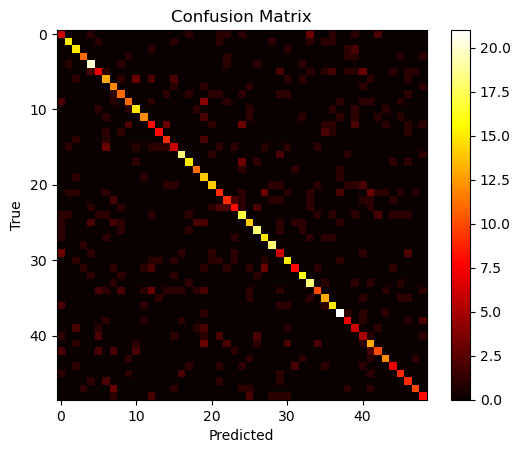

In [10]:
importlib.reload(md)
mejora = {}
mejora["Rate scheduling lineal"] = 0.001
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)


Epoch 0, Loss: 3.304940408839356
loss val: 1.1411897219240685
Epoch 10, Loss: 0.7334691187330172
loss val: 0.5694587267230669
Epoch 20, Loss: 0.2289363128640593
loss val: 0.6125348332442242
Epoch 30, Loss: 0.07862602362675751
loss val: 0.6849610376940328
Epoch 40, Loss: 0.033847595678343716
loss val: 0.7292280195603429
Epoch 50, Loss: 0.02018963907752457
loss val: 0.7558844827874444
Epoch 60, Loss: 0.014441578115182591
loss val: 0.7856027225947771
Epoch 70, Loss: 0.010705326842354777
loss val: 0.8069348120156513
Epoch 80, Loss: 0.008432199140547903
loss val: 0.8263435848586819
Epoch 90, Loss: 0.006951234478815819
loss val: 0.8410773688068665
Epoch 100, Loss: 0.005893336732136495
loss val: 0.8536567250342177
Epoch 110, Loss: 0.005098819007553656
loss val: 0.8652000087511253
Epoch 120, Loss: 0.004472851480285747
loss val: 0.8764069109860608
Epoch 130, Loss: 0.003981006655645863
loss val: 0.8843127104446317
Epoch 140, Loss: 0.0035790675931814627
loss val: 0.8937043247911964
Epoch 150, Los

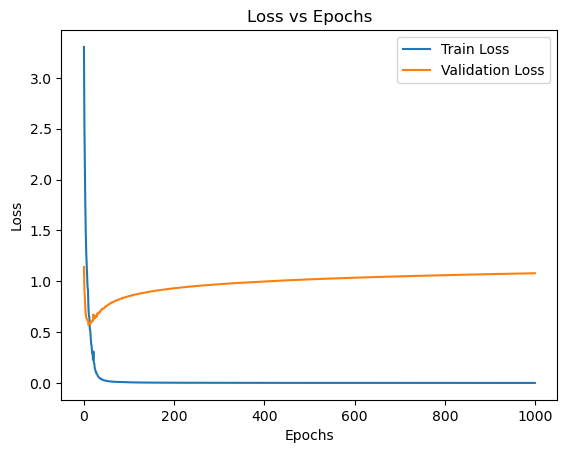

Accuracy: 0.6080
Cross Entropy: 3.4312


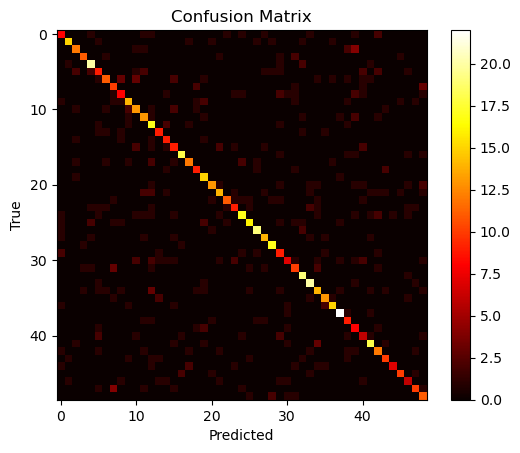

In [11]:
importlib.reload(md)
mejora = {}
mejora["Mini batch stochastic gradient descent"] = 64
minibatch_sgd = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(minibatch_sgd.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 2.9927324912215374
loss val: 1.0612603660541935
Epoch 10, Loss: 0.4176184345580269
loss val: 0.5606461851412028
Epoch 20, Loss: 0.08456249315671802
loss val: 0.6350599671228966
Epoch 30, Loss: 0.02585645244722713
loss val: 0.7121111449729896
Epoch 40, Loss: 0.011181795080583465
loss val: 0.7700273899340121
Epoch 50, Loss: 0.005962394358929145
loss val: 0.8098179364387728
Epoch 60, Loss: 0.003667294741231935
loss val: 0.8464964017405465
Epoch 70, Loss: 0.0024008652373234667
loss val: 0.8768983022961397
Epoch 80, Loss: 0.0016206913818219506
loss val: 0.9069995424519275
Epoch 90, Loss: 0.00111649069506329
loss val: 0.9331343417504999
Epoch 100, Loss: 0.000796361462945436
loss val: 0.95628939530291
Epoch 110, Loss: 0.000576835422274145
loss val: 0.9802731923240693
Epoch 120, Loss: 0.0004208746670891901
loss val: 1.0018068044529655
Epoch 130, Loss: 0.00031077519641120854
loss val: 1.024594334068489
Epoch 140, Loss: 0.0002301701759951216
loss val: 1.0428184127013558
Epoch 150,

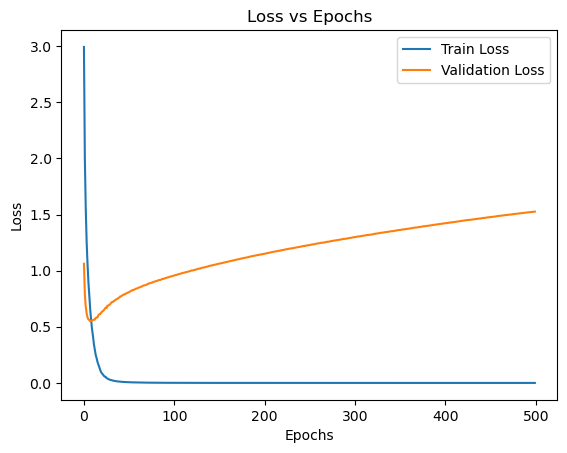

Accuracy: 0.5810
Cross Entropy: 5.7331


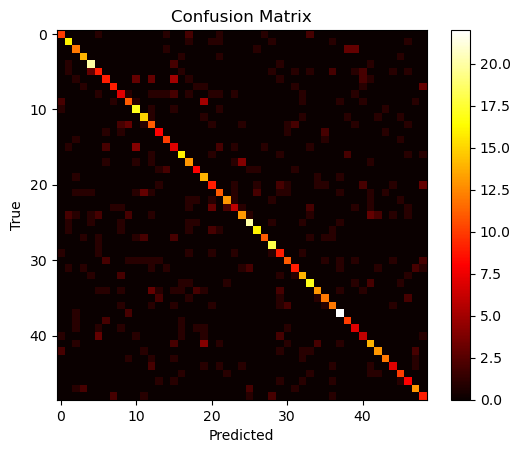

In [19]:
# ADAM
importlib.reload(md)
mejora = {}
mejora["ADAM"] = [0.9, 0.999, 1e-8]
mejora["Mini batch stochastic gradient descent"] = 64
adam = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora, 0.001, 500)
get_metrics = mt.get_metrics(adam.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9540315872399328
loss val: 1.3253342291877779
Epoch 10, Loss: 3.784938834087766
loss val: 1.2779507172881093
Epoch 20, Loss: 3.645990767194886
loss val: 1.243007198879406
Epoch 30, Loss: 3.4857606247931145
loss val: 1.2021759879818668
Epoch 40, Loss: 3.301010332963172
loss val: 1.1537495613781854
Epoch 50, Loss: 3.0930622936135355
loss val: 1.0964370779375543
Epoch 60, Loss: 2.8693830243584895
loss val: 1.032789917377477
Epoch 70, Loss: 2.6503334074627434
loss val: 0.9698856050920843
Epoch 80, Loss: 2.4543689346182123
loss val: 0.9134218344119989
Epoch 90, Loss: 2.2835795090769295
loss val: 0.8653462365635947
Epoch 100, Loss: 2.135895668781924
loss val: 0.8247589246594124
Epoch 110, Loss: 2.0070061881886674
loss val: 0.7904187226758567
Epoch 120, Loss: 1.8942198755592006
loss val: 0.7612269425915142
Epoch 130, Loss: 1.795226532590976
loss val: 0.7365951587076387
Epoch 140, Loss: 1.7078144228599716
loss val: 0.7156959032220437
Epoch 150, Loss: 1.6299108948095586
loss va

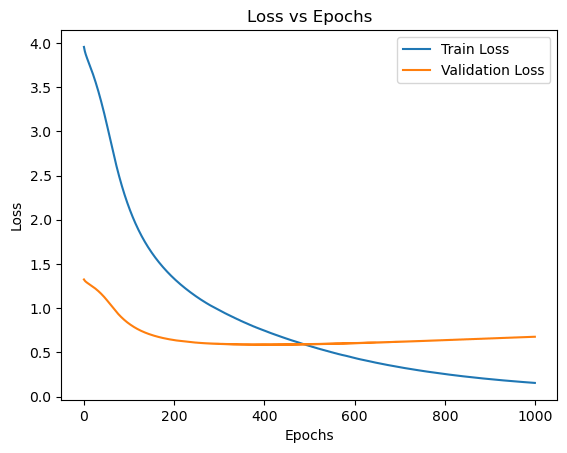

Accuracy: 0.5550
Cross Entropy: 2.0299


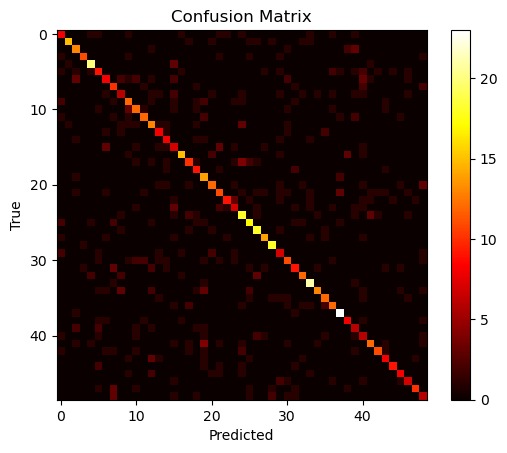

In [13]:
# regularización L2
importlib.reload(md)
mejora = {}
mejora["L2"] = 0.01
l2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(l2.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9979514527210767
loss val: 1.3220275279225029
Epoch 10, Loss: 3.7839601731162116
loss val: 1.2652356902286874
Epoch 20, Loss: 3.646593225194402
loss val: 1.2282346576193426
Epoch 30, Loss: 3.485945678946149
loss val: 1.1835139805248394
Epoch 40, Loss: 3.28526345061582
loss val: 1.1275645500682259
Epoch 50, Loss: 3.0498964372665225
loss val: 1.0612257883953253
Epoch 60, Loss: 2.797049430769322
loss val: 0.9878329219637463
Epoch 70, Loss: 2.556337674075185
loss val: 0.9171426110868209
Epoch 80, Loss: 2.347361504345037
loss val: 0.8563743562812464
Epoch 90, Loss: 2.1716222415836133
loss val: 0.8073695186348935
Epoch 100, Loss: 2.0257347266884085
loss val: 0.7682743600226216
Epoch 110, Loss: 1.903634139525129
loss val: 0.736825697839926
Epoch 120, Loss: 1.7997196716123862
loss val: 0.711309629856039
Epoch 130, Loss: 1.7102664274132315
loss val: 0.6903801239069771
Epoch 140, Loss: 1.6319902063813154
loss val: 0.6727585684280513
Epoch 150, Loss: 1.5623505735539112
loss val: 

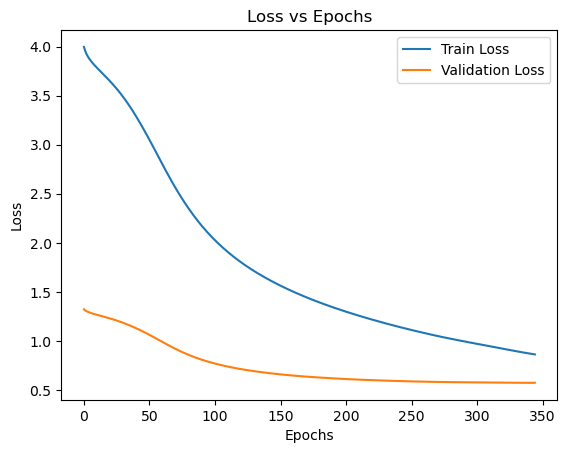

Accuracy: 0.5620
Cross Entropy: 1.7196


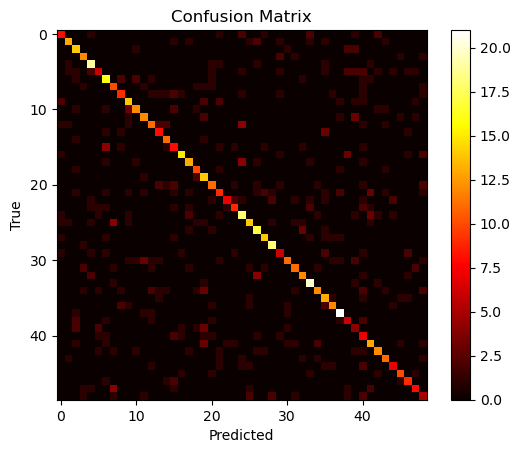

In [14]:
# Early stopping
importlib.reload(md)
mejora = {}
mejora["Early stopping"] = 5
early_stopping = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)

get_metrics = mt.get_metrics(early_stopping.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 4.21360226610855
loss val: 1.4007801977687786
Epoch 10, Loss: 3.9123548712979077
loss val: 1.322581411038872
Epoch 20, Loss: 3.863736070899316
loss val: 1.2942336440657956
Epoch 30, Loss: 3.8319252473453744
loss val: 1.2916223334880224
Epoch 40, Loss: 3.8144950962673714
loss val: 1.2768604073216188
Epoch 50, Loss: 3.7686286314350665
loss val: 1.2752093433690854
Epoch 60, Loss: 3.7219435584972653
loss val: 1.2574017246609521
Epoch 70, Loss: 3.7073394799697357
loss val: 1.2450958151022926
Epoch 80, Loss: 3.66091098574408
loss val: 1.240259116664867
Epoch 90, Loss: 3.639253886448738
loss val: 1.2244955878960297
Epoch 100, Loss: 3.595938619308247
loss val: 1.230835331435426
Epoch 110, Loss: 3.570242720272773
loss val: 1.218092299990144
Epoch 120, Loss: 3.5300691533497712
loss val: 1.2039097974350033
Epoch 130, Loss: 3.491550944833923
loss val: 1.1860226267290734
Epoch 140, Loss: 3.4570407150939335
loss val: 1.1807485414496217
Epoch 150, Loss: 3.4133437228561587
loss val: 1.1

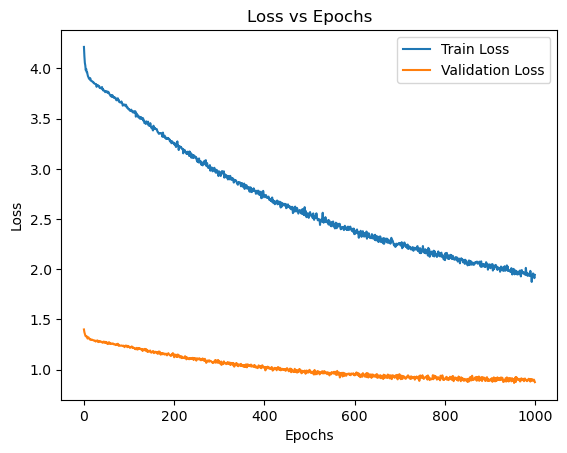

Accuracy: 0.5370
Cross Entropy: 1.9392


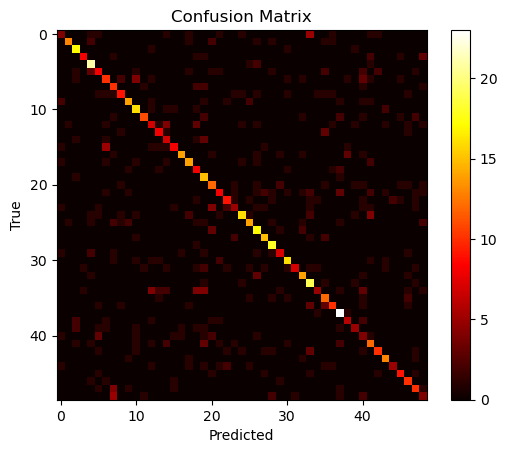

In [15]:
# dropout
importlib.reload(md)
mejora = {}
mejora["Dropout"] = 0.5
dropout = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(dropout.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 9.932498710714826
loss val: 3.342482573816779
Epoch 10, Loss: 10.804893821372627
loss val: 3.6966853725138225
Epoch 20, Loss: 5.761450666092491
loss val: 1.9271273326978817
Epoch 30, Loss: 3.9975559286564573
loss val: 1.3181171364551632
Epoch 40, Loss: 3.891997405153124
loss val: 1.2950217907805786
Epoch 50, Loss: 11.705891943592906
loss val: 3.906579146653297
Epoch 60, Loss: 17.119984806421964
loss val: 5.705150140674415
Epoch 70, Loss: 18.013283336298045
loss val: 6.0434693980694165
Epoch 80, Loss: 18.064547582709288
loss val: 6.041983283963043
Epoch 90, Loss: 18.15594895837505
loss val: 6.018754129966839
Epoch 100, Loss: 18.033846448119366
loss val: 5.986721241701187
Epoch 110, Loss: 3.9526237000512197
loss val: 1.3229990138025667
Epoch 120, Loss: 17.97244417893953
loss val: 6.017422376291107
Epoch 130, Loss: 18.17779372154427
loss val: 6.044160162032718
Epoch 140, Loss: 18.00765309705307
loss val: 5.976663496970775
Epoch 150, Loss: 17.9824574349071
loss val: 5.968534

c:\Users\felic\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\felic\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Epoch 280, Loss: 3.8840986789012373
loss val: 1.298316191719318
Epoch 290, Loss: 3.8837656347072826
loss val: 1.2983341775604065
Epoch 300, Loss: 3.8834453962070747
loss val: 1.2983535089243794
Epoch 310, Loss: 3.882860290565631
loss val: 1.2979775619981089
Epoch 320, Loss: 3.882869051010909
loss val: 1.2984138045756521
Epoch 330, Loss: 17.852630028761702
loss val: 5.939515776044998
Epoch 340, Loss: 18.0215659942834
loss val: 6.011282149373123
Epoch 350, Loss: 18.261034844084776
loss val: 6.0972453262249005


c:\Users\felic\OneDrive\Documentos\GitHub\MLyDL_TPs\Marolda_Felicitas_TP3\src\models.py:379: RuntimeWarning: overflow encountered in multiply
  dvar = np.sum(dz_norm * (z - mean) * -0.5 * std_inv**3, axis=0, keepdims=True)
c:\Users\felic\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\felic\OneDrive\Documentos\GitHub\MLyDL_TPs\Marolda_Felicitas_TP3\src\models.py:382: RuntimeWarning: invalid value encountered in add
  dz_final = dz_norm * std_inv + dvar * 2 * (z - mean) / m + dmean / m
c:\Users\felic\OneDrive\Documentos\GitHub\MLyDL_TPs\Marolda_Felicitas_TP3\src\models.py:189: RuntimeWarning: invalid value encountered in multiply
  self.delta[i] =dz * self.ReLU_derivative(self.z[i-1])


Epoch 360, Loss: nan
loss val: nan
Epoch 370, Loss: nan
loss val: nan
Epoch 380, Loss: nan
loss val: nan
Epoch 390, Loss: nan
loss val: nan
Epoch 400, Loss: nan
loss val: nan
Epoch 410, Loss: nan
loss val: nan
Epoch 420, Loss: nan
loss val: nan
Epoch 430, Loss: nan
loss val: nan
Epoch 440, Loss: nan
loss val: nan
Epoch 450, Loss: nan
loss val: nan
Epoch 460, Loss: nan
loss val: nan
Epoch 470, Loss: nan
loss val: nan
Epoch 480, Loss: nan
loss val: nan
Epoch 490, Loss: nan
loss val: nan
Epoch 500, Loss: nan
loss val: nan
Epoch 510, Loss: nan
loss val: nan
Epoch 520, Loss: nan
loss val: nan
Epoch 530, Loss: nan
loss val: nan
Epoch 540, Loss: nan
loss val: nan
Epoch 550, Loss: nan
loss val: nan
Epoch 560, Loss: nan
loss val: nan
Epoch 570, Loss: nan
loss val: nan
Epoch 580, Loss: nan
loss val: nan
Epoch 590, Loss: nan
loss val: nan
Epoch 600, Loss: nan
loss val: nan
Epoch 610, Loss: nan
loss val: nan
Epoch 620, Loss: nan
loss val: nan
Epoch 630, Loss: nan
loss val: nan
Epoch 640, Loss: nan

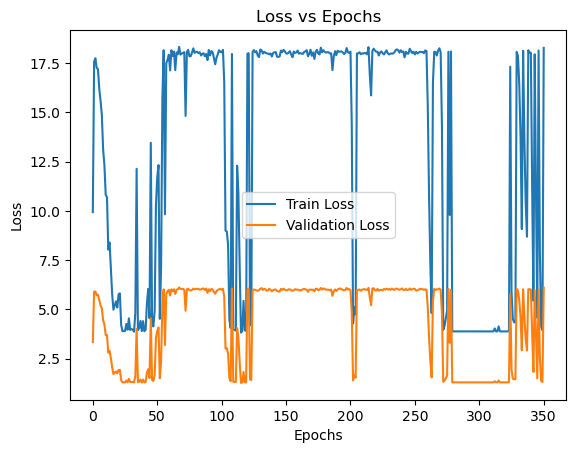

Accuracy: 0.0180
Cross Entropy: nan


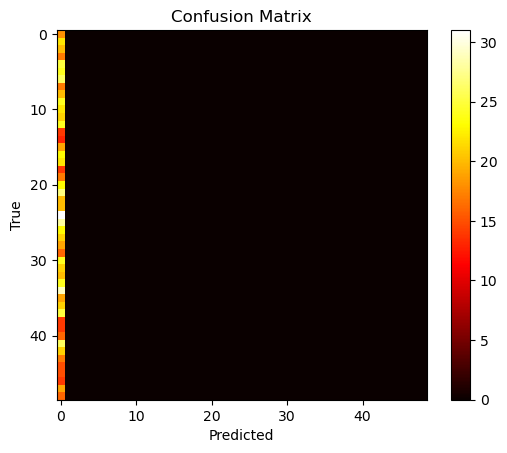

In [22]:
# batch normalization
importlib.reload(md)
mejoras = {}
mejoras["Batch normalization"] = 0.9
batch_norm = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejoras)
get_metrics = mt.get_metrics(batch_norm.forward_pass(X_val, False), y_val)

Explorar cambios en la arquitectura de la red (es decir, la cantidad de capas ocultas y unidades ocultas por capa), y los hiperparámetros (cada uno de los items en la lista anterior tiene una serie de parámetros que podemos variar), y determinar la configuración que funcione mejor (menor error de validación). Llamaremos a este modelo M1

In [ ]:
# vemos la mejor arquitectura
layer_configs = [
    [64],                # 1 capa
    [64, 32],            # 2 capas, más chica
    [80, 100],           # la que ya usás
    [128, 64],           # más profunda que la tuya
    [128, 64, 32],       # 3 capas, decreciente
    [100, 100, 100, 100, 100, 100],  # 5 capas, todas iguales
    [200, 250, 300],  # 3 capas, todas más grandes
]


In [ ]:
# grid search
# definimos hiperparametros a probar 
importlib.reload(md)
importlib.reload(ds)
importlib.reload(mt)
importlib.reload(aux)

learning_rates = [0.001, 0.01, 0.1]
adam_betas = [None,(0.9, 0.999, 1e-8), (0.8, 0.999, 1e-8), (0.9, 0.99, 1e-8)]
rsl = [None, 0.001, 0.01]
batch_size = [None, 32, 64]
l2_lambda = [None, 0.0001, 0.001]
early_stopping_patience = [None, 5]
dropout = [None, 0.8, 0.5]
batch_norm = [None, 0.9]

# Arquitecturas posibles (ejemplos)
layer_configs = [
    [64],                # 1 capa
    [64, 32],            # 2 capas, más chica
    [80, 100],           # la que ya usás
    [128, 64],           # más profunda que la tuya
    [128, 64, 32],       # 3 capas, decreciente
    [100, 100, 100, 100, 100, 100],  # 5 capas, todas iguales
    [200, 250, 300],  # 3 capas, todas más grandes
]

m = {}
m = {
    "Rate scheduling lineal": None,
    "Mini batch stochastic gradient descent": None,
    "ADAM": None,
    "L2": None,
    "Early stopping": None,
    "Dropout": None,
    "Batch normalization": None,
    "Grid search": None
}
# mod = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, m)
aux.grid_search(X_train, y_train, X_val, y_val, learning_rates, adam_betas, rsl, batch_size, l2_lambda, early_stopping_patience, dropout, batch_norm, layer_configs)


Entrenando modelo con parámetros: {'Rate scheduling lineal': None, 'Mini batch stochastic gradient descent': None, 'L2': None, 'ADAM': None, 'Early stopping': None, 'Dropout': None, 'Batch normalization': None}
lr: 0.001
layers: [64]

Funciones de activación: ['ReLU', 'softmax']
modelo entrenado
Pérdida de validación: 3.833989774107959
Nuevo mejor modelo encontrado con pérdida de validación: 3.833989774107959
Entrenando modelo con parámetros: {'Rate scheduling lineal': None, 'Mini batch stochastic gradient descent': None, 'L2': None, 'ADAM': None, 'Early stopping': None, 'Dropout': None, 'Batch normalization': None}
lr: 0.001
layers: [64, 32]

Funciones de activación: ['ReLU', 'ReLU', 'softmax']
modelo entrenado
Pérdida de validación: 3.849337872055547
Entrenando modelo con parámetros: {'Rate scheduling lineal': None, 'Mini batch stochastic gradient descent': None, 'L2': None, 'ADAM': None, 'Early stopping': None, 'Dropout': None, 'Batch normalization': None}
lr: 0.001
layers: [80, 100

IndexError: list assignment index out of range